In [ ]:
## WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API Key
from config import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# Generate the Cities List by Using citipy Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitiudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 597


Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

In [40]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=imperial"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    
     # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']
        
         # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
         # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | roald
Processing Record 4 of Set 1 | sayyan
Processing Record 5 of Set 1 | morant bay
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | kapaa
Processing Record 8 of Set 1 | saint-augustin
Processing Record 9 of Set 1 | ribeira grande
Processing Record 10 of Set 1 | sitka
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | bluff
Processing Record 14 of Set 1 | bad salzungen
Processing Record 15 of Set 1 | cherskiy
Processing Record 16 of Set 1 | korla
Processing Record 17 of Set 1 | yellowknife
Processing Record 18 of Set 1 | bredasdorp
Processing Record 19 of Set 1 | katsuura
Processing Record 20 of Set 1 | mar del plata
Processing Record 21 of Set 1 | sandwick
Processing Record 22 of Set 1 | puerto ayora

Processing Record 38 of Set 4 | tawkar
City not found. Skipping...
Processing Record 39 of Set 4 | labuhan
Processing Record 40 of Set 4 | povolzhskiy
Processing Record 41 of Set 4 | easley
Processing Record 42 of Set 4 | kaitangata
Processing Record 43 of Set 4 | tartagal
Processing Record 44 of Set 4 | galesong
Processing Record 45 of Set 4 | lagoa
Processing Record 46 of Set 4 | nuuk
Processing Record 47 of Set 4 | praia da vitoria
Processing Record 48 of Set 4 | ciudad guayana
Processing Record 49 of Set 4 | saint simons
Processing Record 0 of Set 5 | victoria
Processing Record 1 of Set 5 | provideniya
Processing Record 2 of Set 5 | severo-kurilsk
Processing Record 3 of Set 5 | palmer
Processing Record 4 of Set 5 | moramanga
Processing Record 5 of Set 5 | conceicao do araguaia
Processing Record 6 of Set 5 | seoul
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | coquimbo
Processing Record 9 of Set 5 | sur
Processing Record 10 of Set 5 | petropavlovsk-kamchatskiy


Processing Record 24 of Set 8 | utiroa
City not found. Skipping...
Processing Record 25 of Set 8 | godfrey
Processing Record 26 of Set 8 | ambon
Processing Record 27 of Set 8 | tamandare
Processing Record 28 of Set 8 | bowen
Processing Record 29 of Set 8 | ciras
City not found. Skipping...
Processing Record 30 of Set 8 | henties bay
Processing Record 31 of Set 8 | qandala
Processing Record 32 of Set 8 | la palma
Processing Record 33 of Set 8 | kahului
Processing Record 34 of Set 8 | naryan-mar
Processing Record 35 of Set 8 | olinda
Processing Record 36 of Set 8 | port arthur
Processing Record 37 of Set 8 | richards bay
Processing Record 38 of Set 8 | riyadh
Processing Record 39 of Set 8 | fairbanks
Processing Record 40 of Set 8 | faro
Processing Record 41 of Set 8 | burica
City not found. Skipping...
Processing Record 42 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 43 of Set 8 | kruisfontein
Processing Record 44 of Set 8 | maloy
Processing Record 45 of Set 8 | aya

Processing Record 12 of Set 12 | touros
Processing Record 13 of Set 12 | fukue
Processing Record 14 of Set 12 | parsons
Processing Record 15 of Set 12 | bartica
Processing Record 16 of Set 12 | soyo
Processing Record 17 of Set 12 | the valley
Processing Record 18 of Set 12 | obzor
Processing Record 19 of Set 12 | satitoa
City not found. Skipping...
Processing Record 20 of Set 12 | erice
Processing Record 21 of Set 12 | shetpe
Processing Record 22 of Set 12 | otradnoye
Processing Record 23 of Set 12 | el faiyum
City not found. Skipping...
Processing Record 24 of Set 12 | virginia beach
Processing Record 25 of Set 12 | san luis
Processing Record 26 of Set 12 | atar
Processing Record 27 of Set 12 | paris
Processing Record 28 of Set 12 | morrope
Processing Record 29 of Set 12 | anadyr
Processing Record 30 of Set 12 | santa cruz del sur
Processing Record 31 of Set 12 | mullovka
Processing Record 32 of Set 12 | swift current
Processing Record 33 of Set 12 | salalah
Processing Record 34 of Se

In [42]:
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed", "Country", "Date"]]
city_data_df.count()

City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [44]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,albany,42.6001,-73.9662,36.05,44,59,4.00,US,1675362347
1,roald,62.5833,6.1333,36.75,64,0,13.80,NO,1675362386
2,sayyan,15.1718,44.3244,59.52,53,2,1.23,YE,1675362387
3,morant bay,17.8815,-76.4093,88.72,70,47,10.80,JM,1675362388
4,punta arenas,-53.1500,-70.9167,68.11,37,0,27.63,CL,1675362349


In [47]:
# Export the City_Data into a csv
city_data_df.to_csv('cities.csv')

In [50]:
# Read saved data
city_data_df = pd.read_csv('cities.csv')
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,albany,42.6001,-73.9662,36.05,44,59,4.00,US,1675362347
1,1,roald,62.5833,6.1333,36.75,64,0,13.80,NO,1675362386
2,2,sayyan,15.1718,44.3244,59.52,53,2,1.23,YE,1675362387
3,3,morant bay,17.8815,-76.4093,88.72,70,47,10.80,JM,1675362388
4,4,punta arenas,-53.1500,-70.9167,68.11,37,0,27.63,CL,1675362349


Create the Scatter Plots Required

Latitide Vs. Temperature

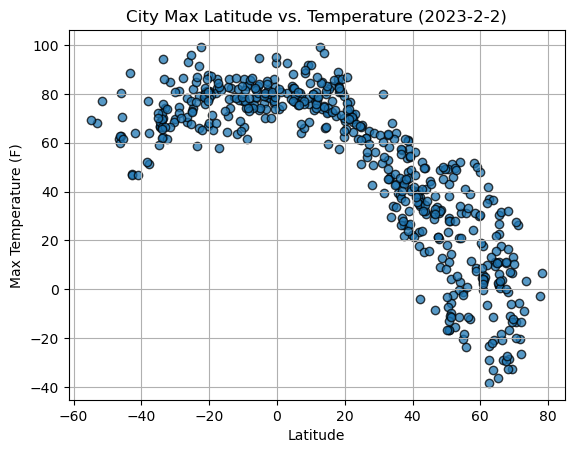

In [55]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker ='o', edgecolors='black', alpha=.75)

plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('City Max Latitude vs. Temperature (2023-2-2)')
plt.grid(True)
plt.show()

Latitude Vs. Humidity

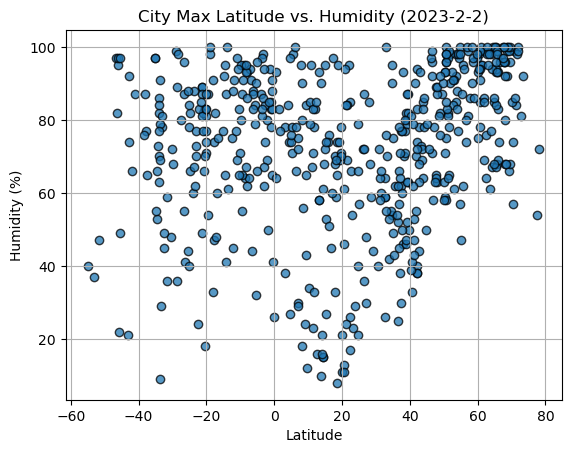

In [56]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker ='o', edgecolors='black', alpha=.75)

plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Max Latitude vs. Humidity (2023-2-2)')
plt.grid(True)
plt.show()

Latitude Vs. Cloudiness

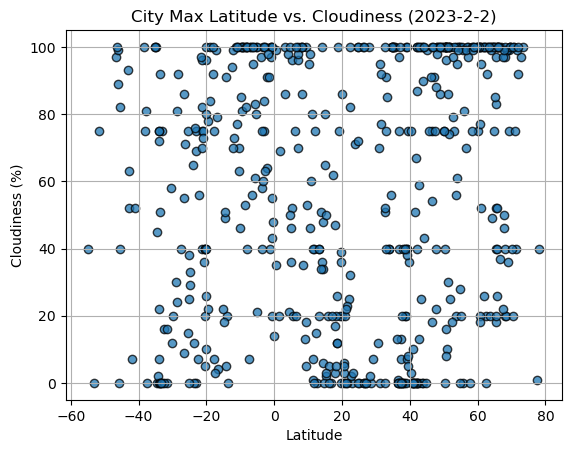

In [57]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker ='o', edgecolors='black', alpha=.75)

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Max Latitude vs. Cloudiness (2023-2-2)')
plt.grid(True)
plt.show()

Latitude Vs. Wind Speed

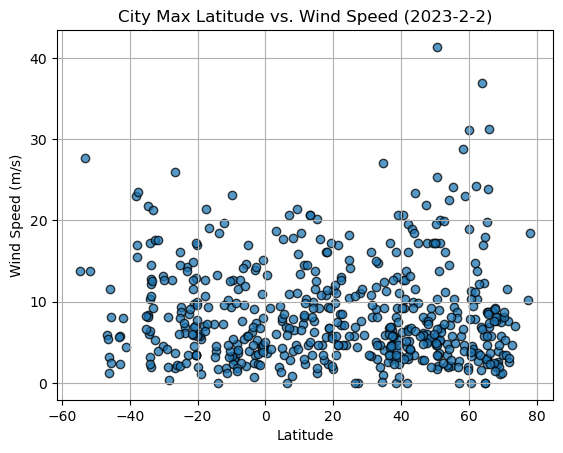

In [58]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker ='o', edgecolors='black', alpha=.75)

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Max Latitude vs. Wind Speed (2023-2-2)')
plt.grid(True)
plt.show()

Requirement 2: Compute Linear Regression for Each Relationship

In [71]:
# Define a function to create Linear Regression plots
import scipy.stats as st

def linear_regression(x,y):
    print(f"The r-value is : {round(st.pearsonr(x,y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_values = x * slope + intercept
    line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    return line_equation

def annotate(line_equation, a, b):
    plt.annotate(line_equation,(a,b), fontsize=15,color="red")
    

In [72]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]
northern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,albany,42.6001,-73.9662,36.05,44,59,4.00,US,1675362347
1,1,roald,62.5833,6.1333,36.75,64,0,13.80,NO,1675362386
2,2,sayyan,15.1718,44.3244,59.52,53,2,1.23,YE,1675362387
3,3,morant bay,17.8815,-76.4093,88.72,70,47,10.80,JM,1675362388
5,5,kapaa,22.0752,-159.3190,71.58,95,25,8.46,US,1675362389


In [73]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]
southern_hemi_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
4,4,punta arenas,-53.1500,-70.9167,68.11,37,0,27.63,CL,1675362349
9,9,east london,-33.0153,27.9116,74.34,78,75,9.22,ZA,1675362391
10,10,ushuaia,-54.8000,-68.3000,69.46,40,40,13.80,AR,1675362392
11,11,bluff,-46.6000,168.3333,61.45,97,97,5.84,NZ,1675362392
16,16,bredasdorp,-34.5322,20.0403,66.22,66,0,8.37,ZA,1675362394


Temperature vs. Latitude Linear Regression Plot

The r-value is : -0.87


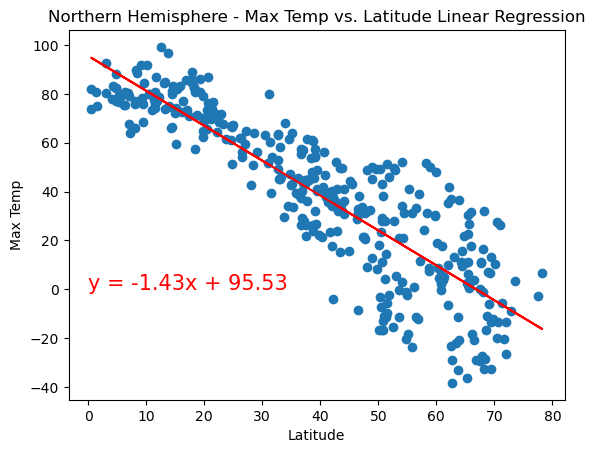

In [74]:
# Linear regression on Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
annotate(equation, 0, 0)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()

For the northern hemisphere, there is a strong negative correlation between latitude and max temperature.

The r-value is : 0.45


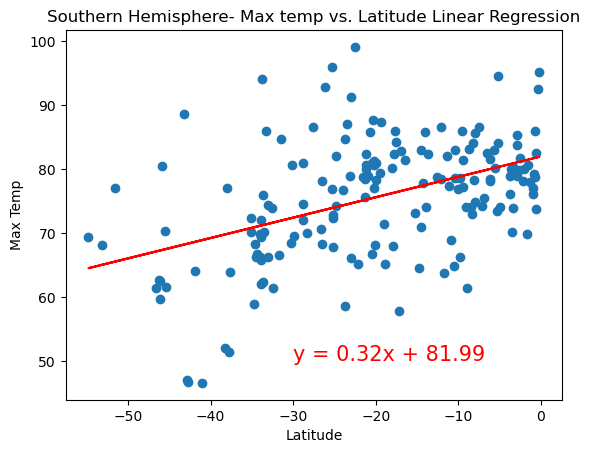

In [75]:
# Linear regression on Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
annotate(equation, -30, 50)
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.title("Southern Hemisphere- Max temp vs. Latitude Linear Regression")
plt.show()

For the southern hemisphere, there is a moderate positive correlation between latitude and max temperature.

Humidity vs. Latitude Linear Regression Plot

The r-value is : 0.47


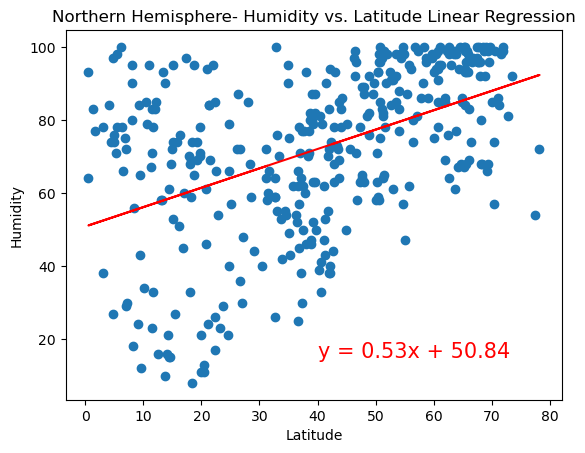

In [76]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
annotate(equation, 40, 15)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere- Humidity vs. Latitude Linear Regression")
plt.show()

For the northern hemisphere, there is a moderate positive correlation between latitude and humidity.

The r-value is : 0.2


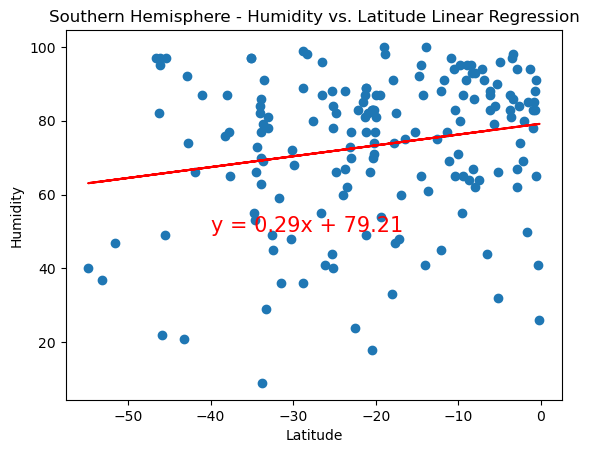

In [77]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
annotate(equation, -40, 50)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
plt.show()

For the southern hemisphere, there is a moderate positive correlation between latitude and humidity.

Cloudiness vs. Latitude Linear Regression

The r-value is : 0.29


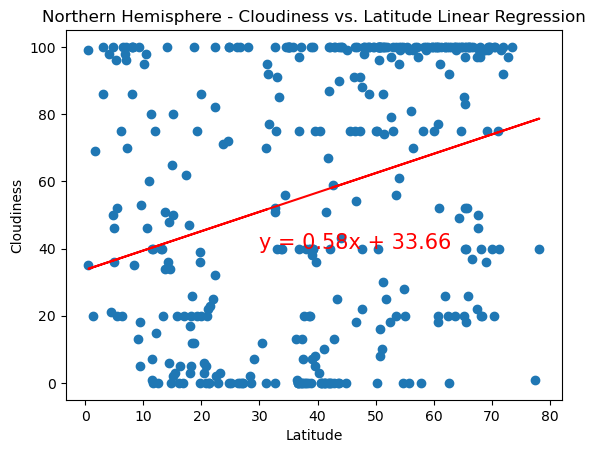

In [78]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
annotate(equation, 30, 40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

For the northern hemisphere, there is a weak positive correlation between latitude and cloudiness.

The r-value is : 0.29


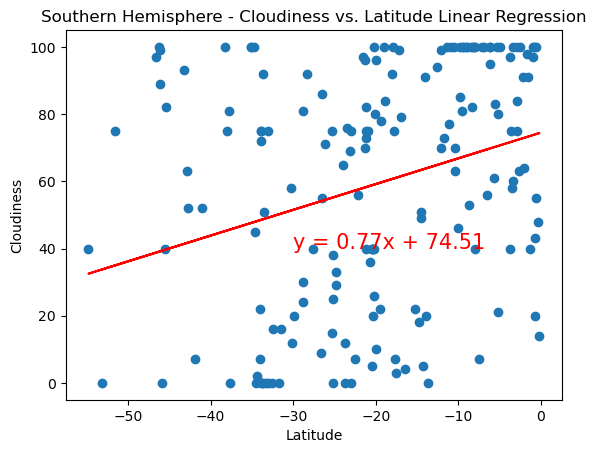

In [79]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
annotate(equation, -30, 40)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
plt.show()

For the southern hemisphere, there is a weak positive correlation between latitude and cloudiness.

Wind Speed vs. Latitude Linear Regression Plot

The r-value is : -0.03


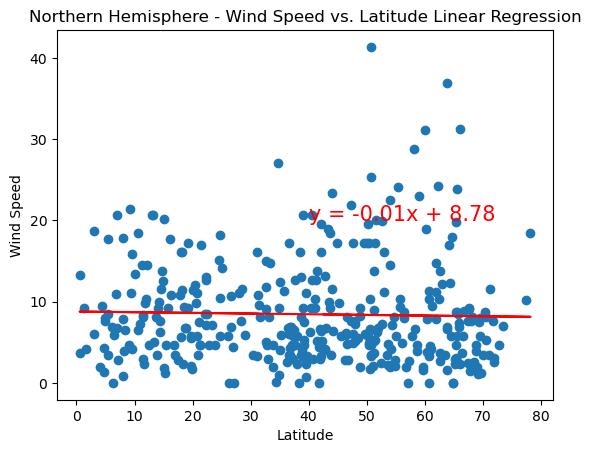

In [80]:
# Northern Hemisphere
equation = linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
annotate(equation, 40, 20)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

For the northern hemisphere, there is a weak positive correlation between latitude and wind speed.

The r-value is : -0.21


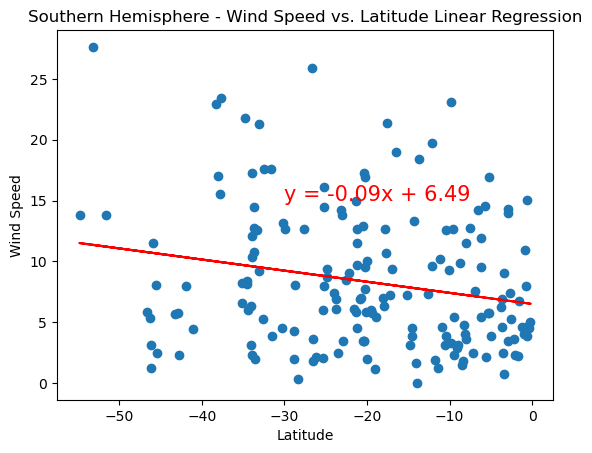

In [81]:
# Southern Hemisphere
equation = linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
annotate(equation, -30, 15)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
plt.show()

For the southern hemisphere, there is a weak negative correlation between latitude and wind speed.